In [1]:
import sys
sys.path.append('../')

# Datasets

We create a dataset by following the instructions [here](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/docs/datasets.md#pix2pix-datasets)

In [2]:
from pathlib import Path

DATAROOT = Path('../data/output/denoiser')
FRAGMENTS_DIR = Path('../data/input/train')
REGION_SIZE = 256
SV = '28'

DATAROOT.mkdir(parents=True, exist_ok=True)
print('Dataroot:', DATAROOT)

Dataroot: ../data/output/denoiser


In [4]:
from sp.data.img2label import Img2LabelDataset

Img2LabelDataset.preprocess(
    REGION_SIZE,
    FRAGMENTS_DIR,
    outdir=DATAROOT,
    sample_path=f'surface_volume/{SV}.tif',
    label_path='ir.png',
    mask_samples_only=True,
    splits=[
        ('train', ['1', '2']),
        ('val', ['3']),
        ('test', ['3'])
    ])

Split: train:   0%|          | 0/2 [00:00<?, ?it/s]

Fold: 1:   0%|          | 0/800 [00:00<?, ?it/s]

Fold: 2:   0%|          | 0/2204 [00:00<?, ?it/s]

Split: val:   0%|          | 0/1 [00:00<?, ?it/s]

Fold: 3:   0%|          | 0/630 [00:00<?, ?it/s]

Split: test:   0%|          | 0/1 [00:00<?, ?it/s]

Fold: 3:   0%|          | 0/630 [00:00<?, ?it/s]

Done!


[fold_A] =  ../data/output/denoiser/A
[fold_B] =  ../data/output/denoiser/B
[fold_AB] =  ../data/output/denoiser
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = train, use 1752/1752 images
split = train, number of images = 1752
split = val, use 324/324 images
split = val, number of images = 324
split = test, use 324/324 images
split = test, number of images = 324
A  B  __meta__	meta.json  test  train	val


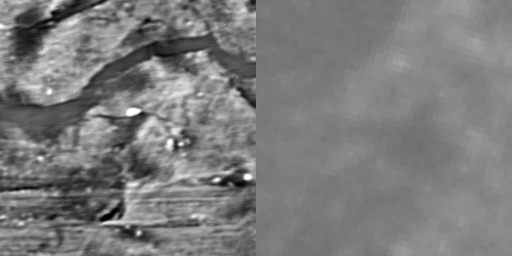

In [3]:
!python datasets/combine_A_and_B.py \
    --fold_A $DATAROOT/A \
    --fold_B $DATAROOT/B \
    --fold_AB $DATAROOT
!ls $DATAROOT

from PIL import Image
Image.MAX_IMAGE_PIXELS = None

Image.open(DATAROOT / 'train/1.png')

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_pix2pix_model.sh [edges2shoes, sat2map, map2sat, facades_label2photo, and day2night]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [5]:
MODEL_NAME = 'xray2ir'

In [10]:
!mkdir -p ./checkpoints/$MODEL_NAME
!ls ./checkpoints/$MODEL_NAME

latest_net_G.pth  train_opt.txt


# Training

-   `python train.py --dataroot ./datasets/facades --name facades_pix2pix --model pix2pix --direction BtoA`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. Add `--direction BtoA` if you want to train a model to transfrom from class B to A.

**NOTE: Attach --continue_train if it gets stuck**

In [ ]:
!python train.py --dataroot $DATAROOT --name $MODEL_NAME --model pix2pix --gpu_ids 0

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ../data/output/denoiser       	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              



Could not connect to Visdom server. 
 Trying to start a server....
Command: /home/tony/.cache/pypoetry/virtualenvs/sp-LVeQk688-py3.10/bin/python -m visdom.server -p 8097 &>/dev/null &
create web directory ./checkpoints/xray2ir/web...
/home/tony/.cache/pypoetry/virtualenvs/sp-LVeQk688-py3.10/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
learning rate 0.0002000 -> 0.0002000
(epoch: 1, iters: 100, time: 0.062, data: 0.074) G_GAN: 2.336 G_L1: 17.675 D_real: 0.169 D_fake: 0.305 
(epoch: 1, iters: 200, time:

(epoch: 4, iters: 1644, time: 0.063, data: 0.001) G_GAN: 2.637 G_L1: 23.887 D_real: 0.001 D_fake: 0.109 
(epoch: 4, iters: 1744, time: 0.063, data: 0.001) G_GAN: 2.365 G_L1: 24.630 D_real: 0.000 D_fake: 0.139 
End of epoch 4 / 200 	 Time Taken: 65 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 5, iters: 92, time: 0.066, data: 0.001) G_GAN: 1.500 G_L1: 32.589 D_real: 0.000 D_fake: 0.410 
(epoch: 5, iters: 192, time: 0.175, data: 0.001) G_GAN: 0.775 G_L1: 8.821 D_real: 1.782 D_fake: 0.316 
(epoch: 5, iters: 292, time: 0.064, data: 0.001) G_GAN: 0.787 G_L1: 8.271 D_real: 1.758 D_fake: 0.446 
(epoch: 5, iters: 392, time: 0.063, data: 0.001) G_GAN: 2.007 G_L1: 14.455 D_real: 0.005 D_fake: 0.186 
(epoch: 5, iters: 492, time: 0.064, data: 0.001) G_GAN: 2.821 G_L1: 23.648 D_real: 0.000 D_fake: 0.077 
(epoch: 5, iters: 592, time: 0.116, data: 0.001) G_GAN: 0.958 G_L1: 10.690 D_real: 2.279 D_fake: 0.442 
(epoch: 5, iters: 692, time: 0.063, data: 0.001) G_GAN: 0.903 G_L1: 15.439 D_real: 1.482 D

(epoch: 9, iters: 284, time: 0.063, data: 0.001) G_GAN: 2.360 G_L1: 17.140 D_real: 0.001 D_fake: 0.123 
(epoch: 9, iters: 384, time: 0.183, data: 0.001) G_GAN: 1.098 G_L1: 9.635 D_real: 1.432 D_fake: 0.182 
(epoch: 9, iters: 484, time: 0.064, data: 0.001) G_GAN: 2.440 G_L1: 9.330 D_real: 2.246 D_fake: 0.062 
(epoch: 9, iters: 584, time: 0.064, data: 0.001) G_GAN: 1.051 G_L1: 9.610 D_real: 1.618 D_fake: 0.558 
(epoch: 9, iters: 684, time: 0.064, data: 0.001) G_GAN: 1.494 G_L1: 26.352 D_real: 0.000 D_fake: 0.770 
(epoch: 9, iters: 784, time: 0.120, data: 0.001) G_GAN: 1.668 G_L1: 15.323 D_real: 0.001 D_fake: 0.477 
(epoch: 9, iters: 884, time: 0.063, data: 0.001) G_GAN: 1.858 G_L1: 12.822 D_real: 0.017 D_fake: 0.244 
(epoch: 9, iters: 984, time: 0.064, data: 0.001) G_GAN: 1.683 G_L1: 20.565 D_real: 0.556 D_fake: 0.336 
saving the latest model (epoch 9, total_iters 15000)
(epoch: 9, iters: 1084, time: 0.064, data: 0.001) G_GAN: 2.316 G_L1: 16.690 D_real: 0.000 D_fake: 1.007 
(epoch: 9, it

(epoch: 13, iters: 676, time: 0.064, data: 0.001) G_GAN: 0.813 G_L1: 9.848 D_real: 0.729 D_fake: 0.498 
(epoch: 13, iters: 776, time: 0.063, data: 0.001) G_GAN: 2.005 G_L1: 16.146 D_real: 0.146 D_fake: 0.165 
(epoch: 13, iters: 876, time: 0.064, data: 0.001) G_GAN: 1.788 G_L1: 21.917 D_real: 0.003 D_fake: 0.284 
(epoch: 13, iters: 976, time: 0.181, data: 0.001) G_GAN: 2.043 G_L1: 12.160 D_real: 0.487 D_fake: 0.127 
(epoch: 13, iters: 1076, time: 0.063, data: 0.001) G_GAN: 1.841 G_L1: 20.081 D_real: 0.048 D_fake: 0.184 
(epoch: 13, iters: 1176, time: 0.063, data: 0.001) G_GAN: 2.234 G_L1: 10.691 D_real: 0.142 D_fake: 0.141 
(epoch: 13, iters: 1276, time: 0.064, data: 0.001) G_GAN: 1.527 G_L1: 14.991 D_real: 0.296 D_fake: 0.296 
(epoch: 13, iters: 1376, time: 0.116, data: 0.001) G_GAN: 0.839 G_L1: 16.082 D_real: 0.391 D_fake: 1.455 
(epoch: 13, iters: 1476, time: 0.063, data: 0.001) G_GAN: 1.131 G_L1: 10.764 D_real: 1.121 D_fake: 0.289 
(epoch: 13, iters: 1576, time: 0.064, data: 0.001) 

(epoch: 17, iters: 1068, time: 0.064, data: 0.001) G_GAN: 1.637 G_L1: 13.592 D_real: 0.025 D_fake: 0.286 
(epoch: 17, iters: 1168, time: 0.118, data: 0.001) G_GAN: 1.413 G_L1: 14.538 D_real: 0.002 D_fake: 0.424 
(epoch: 17, iters: 1268, time: 0.064, data: 0.001) G_GAN: 1.264 G_L1: 11.866 D_real: 0.088 D_fake: 0.410 
(epoch: 17, iters: 1368, time: 0.064, data: 0.001) G_GAN: 1.297 G_L1: 28.013 D_real: 0.000 D_fake: 0.392 
(epoch: 17, iters: 1468, time: 0.064, data: 0.001) G_GAN: 1.060 G_L1: 10.519 D_real: 1.700 D_fake: 0.340 
(epoch: 17, iters: 1568, time: 0.118, data: 0.001) G_GAN: 1.250 G_L1: 27.801 D_real: 0.000 D_fake: 0.383 
(epoch: 17, iters: 1668, time: 0.064, data: 0.001) G_GAN: 1.282 G_L1: 7.581 D_real: 1.612 D_fake: 0.226 
End of epoch 17 / 200 	 Time Taken: 65 sec
learning rate 0.0002000 -> 0.0002000
(epoch: 18, iters: 16, time: 0.064, data: 0.001) G_GAN: 1.046 G_L1: 13.299 D_real: 0.826 D_fake: 0.296 
(epoch: 18, iters: 116, time: 0.064, data: 0.001) G_GAN: 1.324 G_L1: 17.877

# Testing

-   `python test.py --dataroot ./datasets/facades --direction BtoA --model pix2pix --name facades_pix2pix`

Change the `--dataroot`, `--name`, and `--direction` to be consistent with your trained model's configuration and how you want to transform images.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> Note that we specified --direction BtoA as Facades dataset's A to B direction is photos to labels.

> If you would like to apply a pre-trained model to a collection of input images (rather than image pairs), please use --model test option. See ./scripts/test_single.sh for how to apply a model to Facade label maps (stored in the directory facades/testB).

> See a list of currently available models at ./scripts/download_pix2pix_model.sh

In [ ]:
!ls checkpoints/$MODEL_NAME

## Evaluation + Export

In [ ]:
!python test.py --dataroot $DATAROOT --model pix2pix --name $MODEL_NAME

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3)

SAMPLES = [2108, 2110, 2115]

for j, s in enumerate(SAMPLES):    
    for i, fname in enumerate([f'{s}_real_A.png', f'{s}_fake_B.png', f'{s}_real_B.png']):
        img = plt.imread(f'./results/{MODEL_NAME}/test_latest/images/{fname}')
        ax = axs[j][i]
        ax.imshow(img)
        ax.set(yticks=[], yticklabels=[], xticks=[], xticklabels=[], title=fname)

fig.tight_layout()
plt.show()

# Export Test

In [ ]:
from sp.data.img2label import Img2LabelDataset
from sp.data import ImagePrinter

Img2LabelDataset.preprocess(
    REGION_SIZE,
    FRAGMENTS_DIR,
    outdir=DATAROOT / 'evaluation',
    sample_path=f'surface_volume/{SV}.tif',
    label_path='ir.png',
    mask_samples_only=False,
    splits=[
        ('test', ['3'])
    ])

In [ ]:
import json
import torch
import numpy as np
import matplotlib.pyplot as plt
from sp.data import ImagePrinter, padding
from IPython.display import Markdown
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader
from PIL import Image
from pathlib import Path

DENOISER_MODEL = Path('SET_ME')

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    _, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, (title, img) in enumerate(imgs):
        axs[0, i].imshow(np.asarray(img), cmap='gray')
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[], title=title)
pred_image_paths = {}

ds = Image2LabelDataset(DATAROOT / 'evaluation', split='test')
PREDICTIONS_BASE_DIR = DATAROOT / 'evaluation'
model = InkDetector(denoiser=DENOISER_MODEL)

for fragment_id, fragment_dir in [('3', FRAGMENTS_DIR / '3')]:
    display(Markdown(f'## Fragment {fragment_id}'))
    sample_img = Image.open(fragment_dir / f'surface_volume/{SV}.tif')
    
    pred_out_dir = PREDICTIONS_BASE_DIR
    pred_out_dir.mkdir(parents=True, exist_ok=True)
    pred_img = pred_out_dir / 'pred.png'
    pred_image_paths[fragment_id] = pred_img
    # NOTE: A bit hacky using the mask to compute size.
    with Image.open(fragment_dir / 'mask.png') as mask:
        size = mask.size
    with ImagePrinter(pred_img, size=size) as pred_writer:
        for samples, _, regions, masks in tqdm(DataLoader(ds, batch_size=1, shuffle=False)):
            for sample, region, mask in zip(torch.unbind(samples), torch.unbind(regions), torch.unbind(masks)):
                with torch.no_grad():
                    pred = model(sample)
                region = tuple(region.numpy())
                pred = padding.unpad(
                    pred.squeeze(),
                    region,
                    REGION_SIZE)
                pred = (pred * mask.numpy() * 255).astype(np.uint8)
                pred_writer.write(region, pred)

    pred_final = Image.open(pred_img)
    print('Unique prediction values:', np.unique(np.asarray(pred_final)))
    grid = [
        ('Sample', sample_img),
        ('Prediction', pred_final),
    ]
    show(grid)